In [1]:
#import require Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the file 
df=pd.read_csv("day.csv",index_col="instant")     
df[:10]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822


In [3]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


# Data PreProcessing

Convert object to Datetime format

In [5]:
df["dteday"]=pd.DatetimeIndex(df["dteday"])

In [6]:
df["month"]=pd.DatetimeIndex(df["dteday"]).month

In [7]:
df["day"]=pd.DatetimeIndex(df["dteday"]).day

In [8]:
df["year"]=pd.DatetimeIndex(df["dteday"]).year

In [9]:
#drop the date column
df.drop("dteday",axis=1,inplace=True)

# To find most correlated variable 

In [10]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,day,year
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584,4.442600e-01,1.535284e-01,6.039005e-13
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728,-6.316578e-17,-2.249057e-16,1.000000e+00
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191,6.045174e-01,1.669099e-01,7.976995e-13
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764,-1.912625e-02,4.535910e-03,8.195345e-03
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,-0.350848,0.199326,0.036183,9.853998e-03,7.916584e-04,6.852851e-04
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640,1.622686e-02,-2.410535e-03,-1.185197e-02
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929,6.935773e-03,-1.101783e-02,-5.032247e-02
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044,7.649702e-02,8.189816e-02,4.878919e-02
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685,7.771523e-02,7.821203e-02,4.721519e-02
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543,8.254664e-02,9.610618e-02,-1.125471e-01


In [11]:
df.corr()["cnt"].sort_values(ascending=False)

cnt           1.000000
registered    0.945411
casual        0.672123
atemp         0.630685
temp          0.627044
year          0.569728
yr            0.569728
season        0.404584
mnth          0.278191
month         0.117710
day           0.041484
weekday       0.036183
workingday   -0.027640
holiday      -0.068764
hum          -0.098543
windspeed    -0.235132
weathersit   -0.295929
Name: cnt, dtype: float64

By the above observation registered, casual, atemp are independent varible highly Positive correlated with dependent variale cnt

In [12]:
#year and yr column have correlation of 1 so one column presense is to get better prediction
df.drop("year",axis=1,inplace=True)

# Visualization

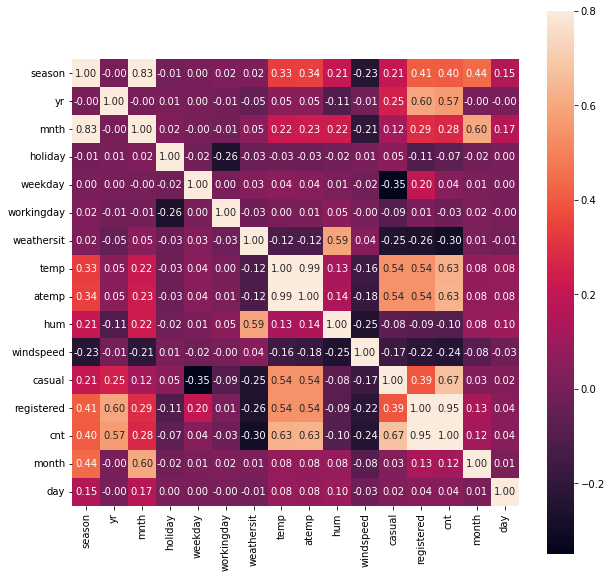

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmax=.8,fmt='.2f',square=True,annot=True)
plt.show()

In [14]:
for i in df.columns:
    print(i,":",len(df[i].unique()))

season : 4
yr : 2
mnth : 12
holiday : 2
weekday : 7
workingday : 2
weathersit : 3
temp : 498
atemp : 689
hum : 594
windspeed : 649
casual : 605
registered : 678
cnt : 695
month : 12
day : 31


To check Presence of outliers

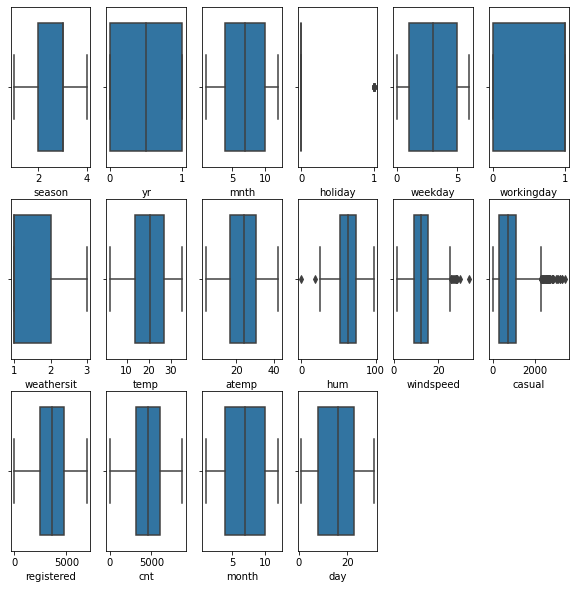

In [15]:
col=df.columns
plt.figure(figsize=(10,10))
for i in range(len(col)):
    plt.subplot(3,6,i+1)
    sns.boxplot(df[col[i]],orient="v")

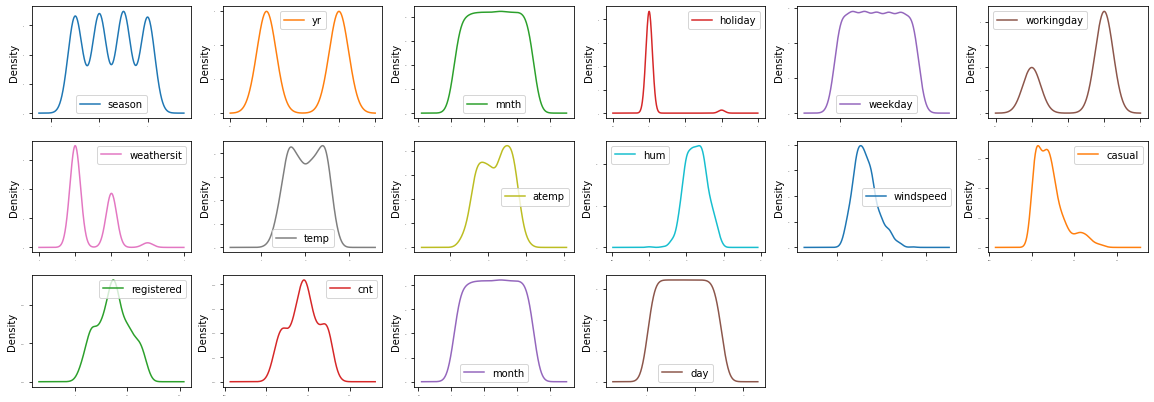

In [16]:
df.plot(kind="density",subplots=True,layout=(3,6),sharex=False,fontsize=1,figsize=(20,7))
plt.show()

In [17]:
df.skew()

season       -0.002571
yr            0.000000
mnth         -0.010478
holiday       5.650014
weekday       0.004634
workingday   -0.825409
weathersit    0.961855
temp         -0.057187
atemp        -0.133709
hum          -0.067476
windspeed     0.676314
casual        1.266328
registered    0.041211
cnt          -0.049581
month        -0.010478
day           0.007537
dtype: float64

there are no high amount of skew present in data

# model Training

In [18]:
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [19]:
#spliting the data as dependent and independent
x=df.loc[:,df.columns!="cnt"]
y=df["cnt"]

In [20]:
print(x.shape,y.shape)

(730, 15) (730,)


### Select of model

In [21]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),AdaBoostRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),ElasticNet(),Lasso()]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)
for m in model:
    m.fit(xtrain,ytrain)
    pred=m.predict(xtest)
    score=r2_score(ytest,pred)
    mae=mean_absolute_error(ytest,pred)
    mse=mean_squared_error(ytest,pred)
    print("model","--",m,"\naccuracy","--",score,"\nMAE","--",mae,"\nMSE","--",mse)
    print("__"*40)

model -- LinearRegression() 
accuracy -- 1.0 
MAE -- 1.2116213664029764e-12 
MSE -- 2.071492544278772e-24
________________________________________________________________________________
model -- DecisionTreeRegressor() 
accuracy -- 0.9880679842977761 
MAE -- 138.96575342465752 
MSE -- 40841.40410958904
________________________________________________________________________________
model -- KNeighborsRegressor() 
accuracy -- 0.9984671726587663 
MAE -- 48.50136986301369 
MSE -- 5246.625753424659
________________________________________________________________________________
model -- SVR() 
accuracy -- 0.07110558206508755 
MAE -- 1495.633927685069 
MSE -- 3179458.797640586
________________________________________________________________________________
model -- AdaBoostRegressor() 
accuracy -- 0.9753654009042467 
MAE -- 240.26980421918873 
MSE -- 84320.33965224012
________________________________________________________________________________
model -- RandomForestRegressor() 
accuracy

From preceding absorvation Linear Regression gives better result